- Considera que cada producto que se encuentra en el almacén central, además de ser identificado por el tipo de embalaje, también posee como propiedad sus dimensiones (largo, ancho y altura con un máximo de 100,0 cm y un mínimo de 5,0 cm en cada dimensión), peso (kg), el tipo de manipulación que requiere (frágil, normal), lugar de procedencia (A, B, C, D) y temperatura de almacenamiento (ambiente, refrigerado).
- Si el vehículo autónomo tiene integrados dos protocolos de manipulación de carga (Protocolo_1 y Protocolo_2), realiza las siguientes operaciones:
a.	Genera un conjunto de datos de prueba (mínimo 10,000 muestras), considerando los criterios antes indicados y teniendo en cuenta tu experiencia personal, donde, a partir del análisis de la información del producto, estos puedan ser catalogados dentro los protocolos disponibles.


|  Ejemplo_1:             |      Ejemplo_2:         | 
|-------------------------|:-----------------------:|
|Embalaje: 1              |Embalaje: 1              |
|Deposito: 1              |Deposito: 1              |
|Ancho(cm): 15,0          |Ancho(cm): 15,0          |
|Largo(cm) 40,0           |Largo(cm) 40,0           |
|Alto(cm): 20,0           |Alto(cm): 20,0           |
|Procedencia: A           |Procedencia: A           |
|Manipulación: Normal     |Manipulación: Normal     |
|Temperatura: refrigerado |Temperatura: refrigerado |
|Protocolo: Protocolo_1   |Protocolo: Protocolo_1   |


1. La planta industrial tiene una distribución como la que se muestra en la figura 1.

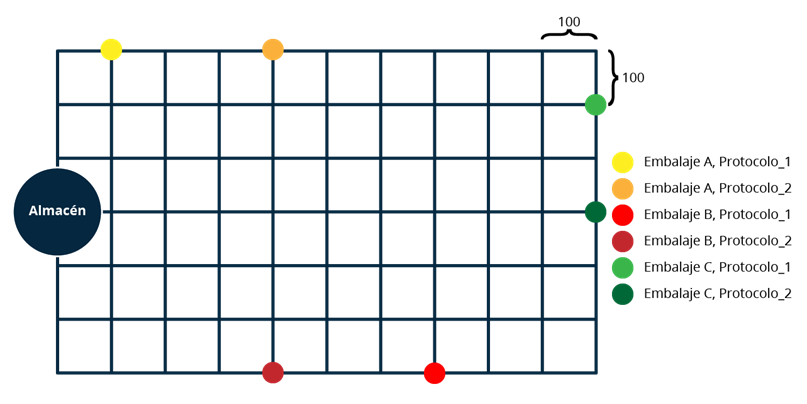

In [1]:
import pandas as pd
import numpy as np

In [2]:
items=range(10000)
embalaje=(['A','B','C'])
deposito=(['1','2','3','4'])
manipulacion=['fragil','normal']
procedencia=['A','B','C','D']
temperatura =['refrigerado', 'Ambiente']

In [21]:
pd.set_option('future.no_silent_downcasting', True) # para la alarma de fillna
dataset_embalaje = pd.DataFrame( columns = ['embalaje'])
dataset_deposito = pd.DataFrame(columns=['deposito'])
dataset_largo = pd.DataFrame(columns=['largo'])
dataset_ancho = pd.DataFrame(columns=['ancho'])
dataset_alto = pd.DataFrame(columns=['alto'])
dataset_peso = pd.DataFrame(columns=['peso'])
dataset_manipulacion = pd.DataFrame(columns=['manipulacion'])
dataset_procedencia = pd.DataFrame(columns=['procedencia'])
dataset_temperatura = pd.DataFrame(columns = ['temperatura'] )
dataset_protocolo = pd.DataFrame(columns = ['protocolo'] , index= items).fillna(1)

In [4]:
for n in items:
    dataset_embalaje.loc[len(dataset_embalaje.index)] = np. random.choice(embalaje)
    
    dataset_largo.loc[len(dataset_largo.index)] = 50 if dataset_embalaje.iloc[n]['embalaje']=='A' else (75 if dataset_embalaje.iloc[n]['embalaje']=='B' else 10)
    
    dataset_manipulacion.loc[len(dataset_manipulacion.index)] = np.random.choice(manipulacion,1,p=[0.4,0.6])
    
    dataset_procedencia.loc[len(dataset_procedencia.index)] = np.random.choice(procedencia)
    
    dataset_temperatura.loc[len(dataset_temperatura.index)] = np.random.choice(temperatura,1,p=[0.25,0.75])

    dataset_deposito.loc[len(dataset_deposito.index)] = np.random.choice(deposito)

In [5]:
for n in items:
    val = np.random.normal(dataset_largo.iloc[n]['largo'],5,1)
    while ((round(val[0]) < (dataset_largo.iloc[n]['largo']-5)) or (round(val[0]) > (dataset_largo.iloc[n]['largo']+5))): 
            val = np.random.normal(dataset_largo.iloc[n]['largo'],5,1)
    dataset_alto.loc[len(dataset_alto.index)] = round(val[0])
    ###############################################################################
    dataset_ancho.loc[len(dataset_ancho.index)]=round(val[0])
for n in items:
        dataset_peso.loc[len(dataset_peso.index)] = (dataset_largo.iloc[n]['largo'] * dataset_alto.iloc[n]['alto'] * dataset_ancho.iloc[n]['ancho']) / 5

In [6]:
df=pd.concat([dataset_embalaje,
             dataset_deposito,
             dataset_largo ,
             dataset_alto ,
             dataset_ancho ,
             dataset_peso ,
             dataset_procedencia,
             dataset_manipulacion,
             dataset_temperatura,
             dataset_protocolo] , axis=1)

In [7]:
df1=df.iloc[:4000,:]
df2=df.iloc[4000:,:]

df1_new= df1.query("peso > 1000 & manipulacion != 'fragil' & temperatura != 'refrigerado'").assign(protocolo=2)
df2_new= df2.query("peso > 1000 & manipulacion != 'normal' & temperatura != 'refrigerado'").assign(protocolo=2)

df1.update(df1_new)
df2.update(df2_new)

final=pd.concat([df1,df2], axis=0)

In [8]:
final

,embalaje,deposito,largo,alto,ancho,peso,procedencia,manipulacion,temperatura,protocolo
0,B,2,75,74,74,82140.0,B,fragil,refrigerado,1
1,C,3,10,6,6,72.0,A,fragil,refrigerado,1
2,A,4,50,53,53,28090.0,D,normal,Ambiente,2
3,C,1,10,15,15,450.0,D,normal,Ambiente,1
4,A,2,50,48,48,23040.0,B,normal,refrigerado,1
...,...,...,...,...,...,...,...,...,...,...
9995,A,2,50,55,55,30250.0,C,normal,refrigerado,1
9996,A,4,50,47,47,22090.0,B,normal,Ambiente,1
9997,A,1,50,47,47,22090.0,B,fragil,Ambiente,2
9998,C,3,10,6,6,72.0,A,normal,refrigerado,1


In [9]:
x=final.drop(columns='deposito')
y=final.deposito

In [20]:
x.embalaje=x.embalaje.replace({"A":1,"B":2,"C":3}).astype(str)
x.procedencia=x.procedencia.replace({"A":1,"B":2,"C":3,"D":4}).astype(str)
x.manipulacion=x.manipulacion.replace({"normal":1,"fragil":2}).astype(str)
x.temperatura=x.temperatura.replace({"Ambiente":1,"refrigerado":2}).astype(str)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)
kmeans = KMeans(n_clusters=3,random_state=42)
kmeans.fit(x_train)

KMeans(n_clusters=3, random_state=42)

Text(0, 0.5, 'Distancia Euclídea')

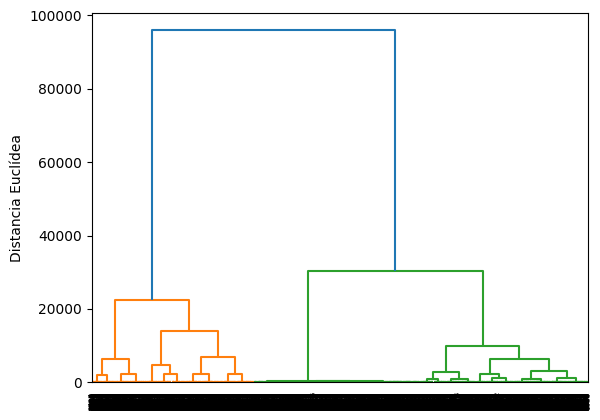

In [13]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

clusters = linkage(x,
                   metric='euclidean',
                   method='complete')

dendr= dendrogram(clusters)
plt.ylabel( 'Distancia Euclídea')

In [15]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=3,
                            linkage= 'complete' )
prediction = ac.fit_predict(x)
print(f'Etiquetas de clase: {prediction}')

Etiquetas de clase: [0 2 1 ... 1 2 1]
